<a href="https://colab.research.google.com/github/jkcg-learning/TennisMatchResultPrediction/blob/main/Jyothish_Kumar_CHANDRASENAN_GEETHAKUMARI_LAJAVANESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Javaness Data Scientist Hiring Challenge**

**Name : - Jyothish Kumar CHANDRASENAN GEETHAKUMARI**

**College : - EPITA, Paris**

**Course : -  MSc Computer Science Specialising in Data Science and Analytics (2019-2021)**



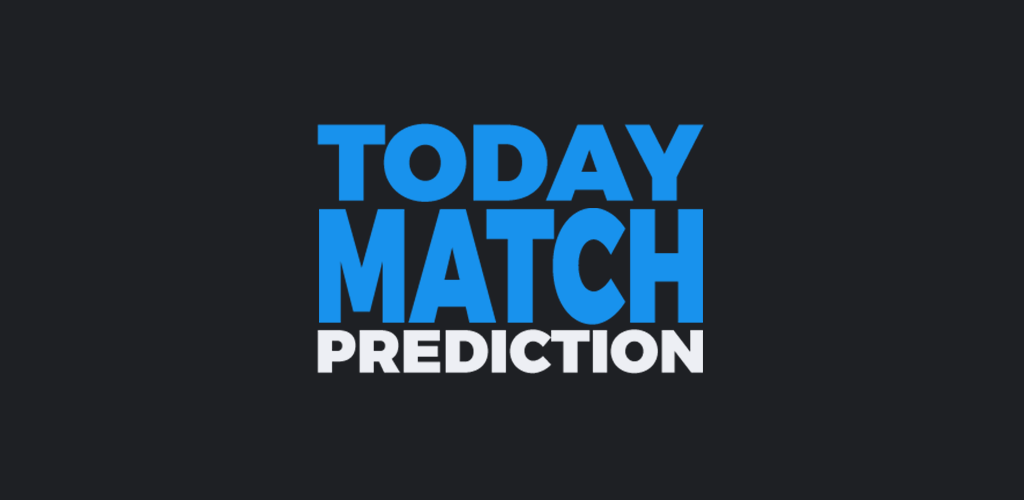


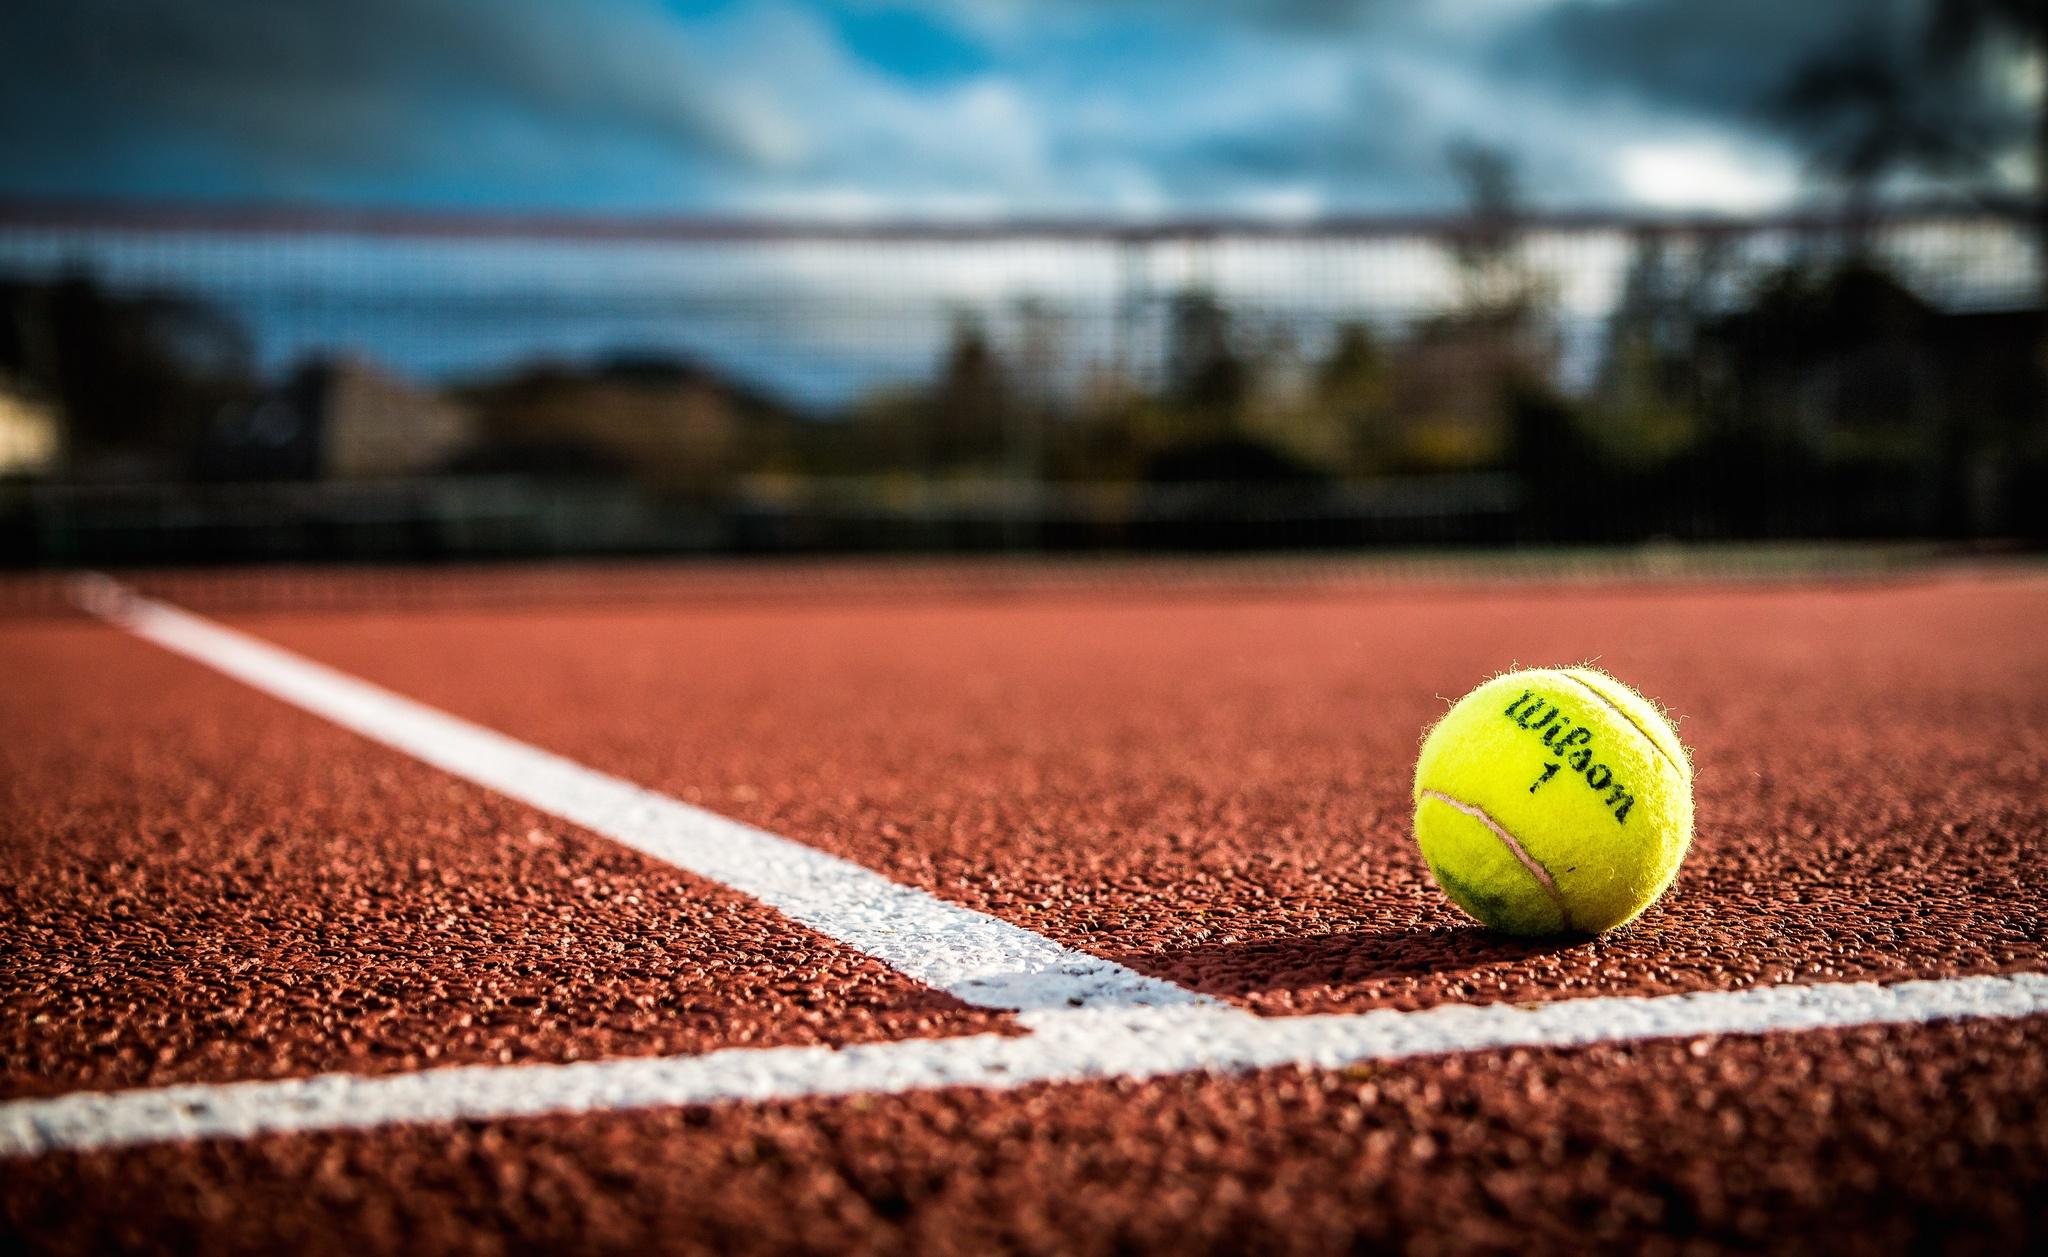





# Data Description

link : http://www.tennis-data.co.uk/notes.txt

Notes for Tennis Data

All data is in csv format, ready for use within standard spreadsheet applications. 

## Key to results data:

    ATP = Tournament number (men),
    WTA = Tournament number (women),
    Location = Venue of tournament Tournament = Name of tounament (including sponsor if relevant),
    Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date), 
    Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold), 
    Tier = Tier (tournament ranking) of WTA tennis series.,
    Court = Type of court (outdoors or indoors), 
    Surface = Type of surface (clay, hard, carpet or grass),
    Round = Round of match, 
    Best of = Maximum number of sets playable in match,
    Winner = Match winner, 
    Loser = Match loser,
    WRank = ATP Entry ranking of the match winner as of the start of the tournament,
    LRank = ATP Entry ranking of the match loser as of the start of the tournament, 
    WPts = ATP Entry points of the match winner as of the start of the tournament, 
    LPts = ATP Entry points of the match loser as of the start of the tournament, 
    W1 = Number of games won in 1st set by match winner,
    L1 = Number of games won in 1st set by match loser,
    W2 = Number of games won in 2nd set by match winner, 
    L2 = Number of games won in 2nd set by match loser,
    W3 = Number of games won in 3rd set by match winner,
    L3 = Number of games won in 3rd set by match loser,
    W4 = Number of games won in 4th set by match winner,
    L4 = Number of games won in 4th set by match loser,
    W5 = Number of games won in 5th set by match winner,
    L5 = Number of games won in 5th set by match loser,
    Wsets = Number of sets won by match winner, 
    Lsets = Number of sets won by match loser,
    Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)


## Key to match betting odds data:

    B365W = Bet365 odds of match winner
    B365L = Bet365 odds of match loser
    B&WW = Bet&Win odds of match winner
    B&WL = Bet&Win odds of match loser
    CBW = Centrebet odds of match winner
    CBL = Centrebet odds of match loser
    EXW = Expekt odds of match winner
    EXL = Expekt odds of match loser
    LBW = Ladbrokes odds of match winner
    LBL = Ladbrokes odds of match loser
    GBW = Gamebookers odds of match winner
    GBL = Gamebookers odds of match loser
    IWW = Interwetten odds of match winner
    IWL = Interwetten odds of match loser
    PSW = Pinnacles Sports odds of match winner
    PSL = Pinnacles Sports odds of match loser
    SBW = Sportingbet odds of match winner
    SBL = Sportingbet odds of match loser
    SJW = Stan James odds of match winner
    SJL = Stan James odds of match loser
    UBW = Unibet odds of match winner
    UBL = Unibet odds of match loser

    MaxW= Maximum odds of match winner (as shown by Oddsportal.com)
    MaxL= Maximum odds of match loser (as shown by Oddsportal.com)
    AvgW= Average odds of match winner (as shown by Oddsportal.com)
    AvgL= Average odds of match loser (as shown by Oddsportal.com)

In [1]:
! pip install -q pandas
! pip install -q numpy
! pip install -q scikit-learn
! pip install -q urlopen
! pip install -q matplotlib
! pip install -q seaborn
! pip install -q plotly
! pip install -q wordcloud
! pip install -q scikit-plot

In [2]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from wordcloud import WordCloud

In [4]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

In [5]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

In [6]:
pd.set_option('display.max_columns', None)
df_atp[0:10]

ATP  Location                          Tournament       Date  \
0    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
1    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
2    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
3    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
4    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
5    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
6    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
7    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
8    1  Adelaide  Australian Hardcourt Championships 2000-01-03   
9    1  Adelaide  Australian Hardcourt Championships 2000-01-03   

          Series    Court Surface      Round  Best of        Winner  \
0  International  Outdoor    Hard  1st Round        3    Dosedel S.   
1  International  Outdoor    Hard  1st Round        3    Enqvist T.   
2  International  Outdoor    Hard  1st Round        3     Escude N.   
3  International  Outdoor    Hard  1st Round        3    Federer R.   
4  International  Outdoor    Hard  1st Round        3   Fromberg R.   
5  International  Outdoor    Hard  1st Round        3  Gambill J.M.   
6  International  Outdoor    Hard  1st Round        3   Grosjean S.   
7  International  Outdoor    Hard  1st Round        3     Henman T.   
8  International  Outdoor    Hard  1st Round        3     Hewitt L.   
9  International  Outdoor    Hard  1st Round        3    Lisnard J.   

            Loser WRank LRank   W1   L1 W2 L2   W3   L3  W4  L4  W5  L5  \
0     Ljubicic I.    63    77  6.0  4.0  6  2  NaN  NaN NaN NaN NaN NaN   
1      Clement A.     5    56  6.0  3.0  6  3  NaN  NaN NaN NaN NaN NaN   
2   Baccanello P.    40   655  6.0  7.0  7  5    6    3 NaN NaN NaN NaN   
3  Knippschild J.    65    87  6.0  1.0  6  4  NaN  NaN NaN NaN NaN NaN   
4   Woodbridge T.    81   198  7.0  6.0  5  7    6    4 NaN NaN NaN NaN   
5      Arthurs W.    58   105  3.0  6.0  7  6    6    4 NaN NaN NaN NaN   
6         Ilie A.    26    51  6.0  2.0  6  1  NaN  NaN NaN NaN NaN NaN   
7     Balcells J.    11   218  6.0  4.0  7  6  NaN  NaN NaN NaN NaN NaN   
8    Woodforde M.    24   129  6.0  3.0  2  6    6    1 NaN NaN NaN NaN   
9      Tebbutt M.   134   351  7.0  6.0  6  7    6    4 NaN NaN NaN NaN   

   Wsets Lsets    Comment  CBW  CBL  GBW  GBL  IWW  IWL  SBW  SBL  B365W  \
0    2.0     0  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
1    2.0     0  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
2    2.0     1  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
3    2.0     0  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
4    2.0     1  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
5    2.0     1  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
6    2.0     0  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
7    2.0     0  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
8    2.0     1  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   
9    2.0     1  Completed  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN   

   B365L  B&WW  B&WL  EXW  EXL  PSW  PSL  WPts  LPts  UBW  UBL  LBW  LBL  SJW  \
0    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
1    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
2    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
3    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
4    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
5    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
6    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
7    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
8    NaN   NaN   NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN   
9    NaN  

In [7]:
print("Number of records in the dataset: - ",len(df_atp))

Number of records in the dataset: -  52298


In [8]:
print("Number of columns in the dataset: - ",df_atp.shape[1])

Number of columns in the dataset: -  54


In [9]:
df_atp.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [10]:
print("**************************")
print("Data type of columns")
print("**************************")

df_atp.info()

**************************
Data type of columns
**************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52283 non-null  object        
 12  LRank       52220 non-null  object        
 13  W1          52035 non-null  float64       
 14  L1          52037 non-null  float64       


In [11]:
print("**************************")
print("Missing Values Information")
print("**************************")
df_atp.isna().sum()

**************************
Missing Values Information
**************************


ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank            15
LRank            78
W1              263
L1              261
W2              772
L2              771
W3            28129
L3            28130
W4            47567
L4            47567
W5            50507
L5            50507
Wsets           224
Lsets           225
Comment           0
CBW           34792
CBL           34792
GBW           47243
GBL           47243
IWW           38940
IWL           38940
SBW           46874
SBL           46874
B365W          8655
B365L          8632
B&WW          51201
B&WL          51201
EXW           12887
EXL           12882
PSW           14959
PSL           14959
WPts          16204
LPts          16263
UBW           41627
UBL           41627
LBW           24167
LBL           24156
SJW           36726
SJL           36719


In [12]:
print("******************************************")
print("Filling Missing Values with 0")
df_atp = df_atp.fillna(0,axis=1)
print("******************************************")

print("Number of Missing Values in the Dataset after filling ")
print("******************************************")
df_atp.isna().sum()

******************************************
Filling Missing Values with 0
******************************************
Number of Missing Values in the Dataset after filling 
******************************************


ATP           0
Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
W1            0
L1            0
W2            0
L2            0
W3            0
L3            0
W4            0
L4            0
W5            0
L5            0
Wsets         0
Lsets         0
Comment       0
CBW           0
CBL           0
GBW           0
GBL           0
IWW           0
IWL           0
SBW           0
SBL           0
B365W         0
B365L         0
B&WW          0
B&WL          0
EXW           0
EXL           0
PSW           0
PSL           0
WPts          0
LPts          0
UBW           0
UBL           0
LBW           0
LBL           0
SJW           0
SJL           0
MaxW          0
MaxL          0
AvgW          0
AvgL          0
dtype: int64

In [13]:
print("******************************************")
print("Converting relevant variables to float type")
print("******************************************")


df_atp['W1']=pd.to_numeric(df_atp["W1"],errors='coerce').fillna(0).astype(float)  
df_atp['L1']=pd.to_numeric(df_atp["L1"],errors='coerce').fillna(0).astype(float) 

df_atp['W2']=pd.to_numeric(df_atp["W2"],errors='coerce').fillna(0).astype(float)  
df_atp['L2']=pd.to_numeric(df_atp["L2"],errors='coerce').fillna(0).astype(float) 

df_atp['W3']=pd.to_numeric(df_atp["W3"],errors='coerce').fillna(0).astype(float)  
df_atp['L3']=pd.to_numeric(df_atp["L3"],errors='coerce').fillna(0).astype(float) 

df_atp['W4']=pd.to_numeric(df_atp["W4"],errors='coerce').fillna(0).astype(float)  
df_atp['L4']=pd.to_numeric(df_atp["L4"],errors='coerce').fillna(0).astype(float)

df_atp['W5']=pd.to_numeric(df_atp["W5"],errors='coerce').fillna(0).astype(float)  
df_atp['L5']=pd.to_numeric(df_atp["L5"],errors='coerce').fillna(0).astype(float) 

df_atp['Lsets']=pd.to_numeric(df_atp["Lsets"],errors='coerce').fillna(0).astype(float)
df_atp['EXW']=pd.to_numeric(df_atp["EXW"],errors='coerce').fillna(0).astype(float)

df_atp['WRank']=pd.to_numeric(df_atp["WRank"],errors='coerce').fillna(0).astype(float)
df_atp['LRank']=pd.to_numeric(df_atp["LRank"],errors='coerce').fillna(0).astype(float)


df_atp.info()

******************************************
Converting relevant variables to float type
******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52298 non-null  float64       
 12  LRank       52298 non-null  float64       
 13  W1          52298 non-null  float64 

In [14]:
# Creating a new column called year from the Date object

print("******************************************")
print("Extracting YEAR from Date Variable")
print("******************************************")

df_atp['Date'] = pd.to_datetime(df_atp['Date'])

df_atp['Year'] = df_atp['Date'].dt.year

df_atp['Year']

******************************************
Extracting YEAR from Date Variable
******************************************


0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
52293    2018
52294    2018
52295    2018
52296    2018
52297    2018
Name: Year, Length: 52298, dtype: int64

In [15]:
# To check the unique list of winners
df_atp['Winner'].unique()

array(['Dosedel S.', 'Enqvist T.', 'Escude N.', 'Federer R.',
       'Fromberg R.', 'Gambill J.M.', 'Grosjean S.', 'Henman T.',
       'Hewitt L.', 'Lisnard J.', 'Martin A.', 'Norman M.', 'Petrovic D.',
       'Sekulov J.', 'Stoltenberg J.', 'Vinck C.', 'Agenor R.',
       'Behrend T.', 'Damm M.', 'Delgado J.', 'Golmard J.', 'Hantschk M.',
       'Jonsson F.', 'Ketola T.', 'Manta L.', 'Paes L.', 'Pioline C.',
       'Sanguinetti D.', 'Stanoytchev O.', 'Tabara M.', 'Vanek J.',
       'Vinciguerra A.', 'Bastl G.', 'Berasategui A.', 'Caratti C.',
       'Cherkasov A.', 'El Aynaoui Y.', 'Gaudio G.', 'Kiefer N.',
       'Marin J.A.', 'Mirnyi M.', 'Santoro F.', 'Schalken S.',
       'Schuettler R.', 'Squillari F.', 'Tillstrom M.', 'Vacek D.',
       'van Lottum J.', 'Balcells J.', 'Chang M.', 'Ferrero J.C.',
       'Gustafsson M.', 'Haas T.', 'Johansson T.', 'Novak J.',
       'Rosset M.', 'Sell M.', 'Arazi H.', 'Clavet F.', 'Clement A.',
       'Corretja A.', 'Hrbaty D.', 'Ilie A.', 'Koubek

In [16]:
df_atp['Winner'].value_counts()

Federer R.      1121
Nadal R.         891
Djokovic N.      802
Ferrer D.        691
Murray A.        624
                ... 
Stebe C-M.         1
Gomez A.           1
Galan D.E.         1
Rodrigues M.       1
Traykov I.         1
Name: Winner, Length: 948, dtype: int64

# 1. Who are the three ATP players with the most wins ?

**********************
Top three ATP Players
**********************
Federer R.     1121
Nadal R.        891
Djokovic N.     802
Name: Winner, dtype: int64
#############################################################################################################################################
Please note there are some values for "Federer R. ", "Nadal-Parera R." , "Djokovic N. " which I am ignoring due to formatting issue!!! 
#############################################################################################################################################


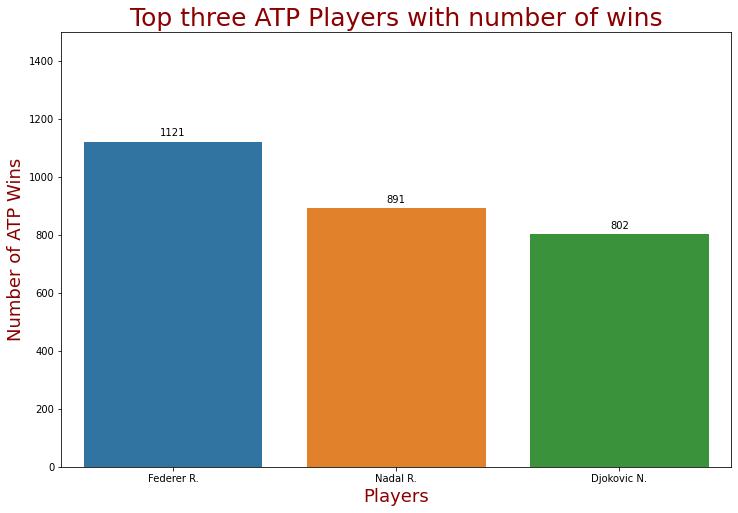

In [17]:
print("**********************")
print("Top three ATP Players")
print("**********************")

top3_winners = df_atp['Winner'].value_counts()[0:3]  
print(top3_winners)

print("#############################################################################################################################################")
print("""Please note there are some values for "Federer R. ", "Nadal-Parera R." , "Djokovic N. " which I am ignoring due to formatting issue!!! """)
print("#############################################################################################################################################")
plt.figure(figsize=(12,8))
ax = sns.barplot(x=top3_winners.index, y=top3_winners)
ax.set_ylim(0, 1500)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2.0, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Players", size= 18, color="darkred")
plt.ylabel("Number of ATP Wins",size =18, color = "darkred")
plt.title("Top three ATP Players with number of wins",size=25, color= "darkred")
plt.show()

# 2. How many sets did the player “ Federer R.” win in total ?

In [18]:
winner_sets = df_atp.groupby("Winner")["Wsets"].sum()
print("****************************")
print("Sets won by Roger Federer")
print("****************************")
print(int(winner_sets["Federer R."]))

print("###########################################################################################################")
print("""Please note there are some values for "Federer R. ", which I am ignoring due to formatting issue!!! """)
print("###########################################################################################################")

fig2 = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = winner_sets["Federer R."],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Number of Sets won by Roger Federer in ATP"},
    gauge = {
        'axis': { 'tickwidth': 5, 'tickcolor': "darkgreen"},
        'bar': {'color': "darkblue"},}))

fig2.show()



****************************
Sets won by Roger Federer
****************************
2546
###########################################################################################################
Please note there are some values for "Federer R. ", which I am ignoring due to formatting issue!!! 
###########################################################################################################


# 3. How many sets did the player “ Federer R.” win during the years 2016 and 2017 ?

In [19]:
year_winners_sets = df_atp.groupby("Year")["Winner","Wsets"]

year_winners_sets_2016 = year_winners_sets.get_group(2016)
year_winners_sets_2017 = year_winners_sets.get_group(2017)

winner_sets_2016 = year_winners_sets_2016.groupby("Winner")["Wsets"].sum()
winner_sets_2017 = year_winners_sets_2017.groupby("Winner")["Wsets"].sum()

print("*********************************************")
print("Sets won by Roger Federer in 2016 and 2017")
print("*********************************************")
print(int(winner_sets_2016["Federer R."])+int(winner_sets_2017["Federer R."]))

print("###########################################################################################################")
print("""Please note there are some values for "Federer R. " , which I am ignoring due to formatting issue!!! """)
print("###########################################################################################################")

fig3 = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = winner_sets_2016["Federer R."]+winner_sets_2017["Federer R."],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Number of Sets won by Roger Federer in ATP for the year 2016 and 2017"},
    gauge = {
        'axis': { 'tickwidth': 5, 'tickcolor': "darkblue"},
        'bar': {'color': "darkgreen"} }))

fig3.show()



*********************************************
Sets won by Roger Federer in 2016 and 2017
*********************************************
172
###########################################################################################################
Please note there are some values for "Federer R. " , which I am ignoring due to formatting issue!!! 
###########################################################################################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# 4. For each match, what is the percentage of victories of the winner in the past ?

In [20]:

%%time 
## Please note this cell will take atleast 3-4 minutes to execute completely

print("###########################################################################################################")
print("Creating the records of Match, Game and Set winning percentages of every player based on past performance")
print("                                                 Please be patient                                       ")
print("###########################################################################################################")

players_history = {}

for each_player in df_atp['Winner']:
    players_history[each_player] = {'TotalMatchWin':0,'TotalMatchLost':0,'TotalGameWon':0,'TotalGameLost':0,'TotalSetsWon':0,'TotalSetsLost':0}

for each_player in df_atp['Loser']:
    players_history[each_player] = {'TotalMatchWin':0,'TotalMatchLost':0,'TotalGameWon':0,'TotalGameLost':0,'TotalSetsWon':0,'TotalSetsLost':0}
    
#print(player_win_loss_history)    
    
for i in range(0, len(df_atp)):

    winner_player = df_atp.loc[i,'Winner']
    loser_player = df_atp.loc[i,'Loser']
    
    w1 = df_atp.loc[i,'W1']
    w2 = df_atp.loc[i,'W2']
    w3 = df_atp.loc[i,'W3']
    w4 = df_atp.loc[i,'W4']
    w5 = df_atp.loc[i,'W5']
    
    l1 = df_atp.loc[i,'L1']
    l2 = df_atp.loc[i,'L2']
    l3 = df_atp.loc[i,'L3']
    l4 = df_atp.loc[i,'L4']
    l5 = df_atp.loc[i,'L5']
    
    w_sets = df_atp.loc[i,'Wsets']
    l_sets = df_atp.loc[i,'Lsets']
    
    player1_total_match_win = players_history[winner_player]['TotalMatchWin']
    player1_total_match_loss = players_history[winner_player]['TotalMatchLost']
    player1_total_match = player1_total_match_win + player1_total_match_loss
    
    player1_total_game_win = players_history[winner_player]['TotalGameWon']
    player1_total_game_loss = players_history[winner_player]['TotalGameLost']
    player1_total_game = player1_total_game_win + player1_total_game_loss
    
    player1_total_sets_win = players_history[winner_player]['TotalSetsWon']
    player1_total_sets_loss = players_history[winner_player]['TotalSetsLost']
    player1_total_sets = player1_total_sets_win + player1_total_sets_loss
    
    
    player2_total_match_win = players_history[loser_player]['TotalMatchWin']
    player2_total_match_loss = players_history[loser_player]['TotalMatchLost']
    player2_total_match = player2_total_match_win + player2_total_match_loss
    
    player2_total_game_win = players_history[loser_player]['TotalGameWon']
    player2_total_game_loss = players_history[loser_player]['TotalGameLost']
    player2_total_game = player2_total_game_win + player2_total_game_loss
    
    player2_total_sets_win = players_history[loser_player]['TotalSetsWon']
    player2_total_sets_loss = players_history[loser_player]['TotalSetsLost']
    player2_total_sets = player2_total_sets_win + player2_total_sets_loss
    
    
    
    if (player1_total_match == 0):

      df_atp.loc[i, 'Player1MatchVictory%'] = 0
      df_atp.loc[i, 'Player1GameVictory%'] = 0
      df_atp.loc[i, 'Player1SetVictory%'] = 0
      

    if (player2_total_match == 0):    

      df_atp.loc[i, 'Player2MatchVictory%'] = 0
      df_atp.loc[i, 'Player2GameVictory%'] = 0
      df_atp.loc[i, 'Player2SetVictory%'] = 0    
      

    elif ((player1_total_match != 0) and (player2_total_match != 0) ):

      df_atp.loc[i, 'Player1MatchVictory%'] = round((player1_total_match_win  / player1_total_match) * 100,2)
      df_atp.loc[i, 'Player1GameVictory%'] = round((player1_total_game_win  / player1_total_game) * 100,2)
      df_atp.loc[i, 'Player1SetVictory%'] = round((player1_total_sets_win  / player1_total_sets) * 100,2)
        
      df_atp.loc[i, 'Player2MatchVictory%'] = round((player2_total_match_loss  / player2_total_match) * 100,2)
      df_atp.loc[i, 'Player2GameVictory%'] = round((player2_total_game_loss  / player2_total_game) * 100,2)
      df_atp.loc[i, 'Player2SetVictory%'] = round((player2_total_sets_loss  / player2_total_sets) * 100,2)
    
    
    players_history[winner_player]['TotalMatchWin'] = players_history[winner_player]['TotalMatchWin'] + 1
    players_history[loser_player]['TotalMatchLost'] = players_history[loser_player]['TotalMatchLost'] + 1
    
    players_history[winner_player]['TotalGameWon'] = players_history[winner_player]['TotalGameWon'] + w1 + w2 + w3 + w4 + w5
    players_history[loser_player]['TotalGameLost'] = players_history[loser_player]['TotalGameLost'] + l1 + l2 + l3 + l4 + l5
    
    players_history[winner_player]['TotalSetsWon'] = players_history[winner_player]['TotalSetsWon'] + w_sets
    players_history[loser_player]['TotalSetsLost'] = players_history[loser_player]['TotalSetsLost'] + l_sets
    

#print(player_win_loss_history)      
#print(df_atp['Player1MatchVictory%'])
#print(df_atp['Player1GameVictory%'])
#print(df_atp['Player1SetVictory%'])

#print(df_atp['Player2MatchVictory%'])
#print(df_atp['Player2GameVictory%'])
#print(df_atp['Player2SetVictory%'])

print("***********************************************************************************")
print("Match, Game and Set Victory Percentage of Federer before the start of every match")
print("************************************************************************************")

Federer = df_atp[(df_atp["Winner"]=="Federer R.")]
print(Federer.loc[:,['Winner','Loser','Player1MatchVictory%', 'Player1GameVictory%', 'Player1SetVictory%']])

###########################################################################################################
Creating the records of Match, Game and Set winning percentages of every player based on past performance
                                                 Please be patient                                       
###########################################################################################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: RuntimeWarning:

invalid value encountered in double_scalars



***********************************************************************************
Match, Game and Set Victory Percentage of Federer before the start of every match
************************************************************************************
           Winner           Loser  Player1MatchVictory%  Player1GameVictory%  \
3      Federer R.  Knippschild J.                  0.00                 0.00   
168    Federer R.        Chang M.                 33.33                40.00   
229    Federer R.      Kroslak J.                 50.00                63.27   
316    Federer R.       Dupuis A.                 50.00                65.79   
329    Federer R.    Johansson T.                 57.14                70.45   
...           ...             ...                   ...                  ...   
52265  Federer R.       Raonic M.                 82.97                85.07   
52274  Federer R.      Fognini F.                 82.99                85.07   
52279  Federer R.    Nishikor

In [21]:
# Complete Game Status of each Player
print(players_history) 

{'Dosedel S.': {'TotalMatchWin': 22, 'TotalMatchLost': 36, 'TotalGameWon': 347.0, 'TotalGameLost': 359.0, 'TotalSetsWon': 50.0, 'TotalSetsLost': 16.0}, 'Enqvist T.': {'TotalMatchWin': 137, 'TotalMatchLost': 115, 'TotalGameWon': 2099.0, 'TotalGameLost': 1259.0, 'TotalSetsWon': 300.0, 'TotalSetsLost': 55.0}, 'Escude N.': {'TotalMatchWin': 109, 'TotalMatchLost': 78, 'TotalGameWon': 1652.0, 'TotalGameLost': 787.0, 'TotalSetsWon': 238.0, 'TotalSetsLost': 38.0}, 'Federer R.': {'TotalMatchWin': 1121, 'TotalMatchLost': 232, 'TotalGameWon': 17205.0, 'TotalGameLost': 3050.0, 'TotalSetsWon': 2546.0, 'TotalSetsLost': 149.0}, 'Fromberg R.': {'TotalMatchWin': 19, 'TotalMatchLost': 30, 'TotalGameWon': 326.0, 'TotalGameLost': 344.0, 'TotalSetsWon': 42.0, 'TotalSetsLost': 17.0}, 'Gambill J.M.': {'TotalMatchWin': 140, 'TotalMatchLost': 134, 'TotalGameWon': 2029.0, 'TotalGameLost': 1390.0, 'TotalSetsWon': 291.0, 'TotalSetsLost': 51.0}, 'Grosjean S.': {'TotalMatchWin': 269, 'TotalMatchLost': 187, 'TotalGa

In [22]:
# Generating unique id to each player
players_id = {}
id_generator = 1
for eachplayer in players_history.keys():
    players_id[eachplayer] = id_generator
    id_generator = id_generator + 1
print("Total Number of Tennis Players: -" ,len(players_id.keys()))    
players_id  

Total Number of Tennis Players: - 1485


{'Dosedel S.': 1,
 'Enqvist T.': 2,
 'Escude N.': 3,
 'Federer R.': 4,
 'Fromberg R.': 5,
 'Gambill J.M.': 6,
 'Grosjean S.': 7,
 'Henman T.': 8,
 'Hewitt L.': 9,
 'Lisnard J.': 10,
 'Martin A.': 11,
 'Norman M.': 12,
 'Petrovic D.': 13,
 'Sekulov J.': 14,
 'Stoltenberg J.': 15,
 'Vinck C.': 16,
 'Agenor R.': 17,
 'Behrend T.': 18,
 'Damm M.': 19,
 'Delgado J.': 20,
 'Golmard J.': 21,
 'Hantschk M.': 22,
 'Jonsson F.': 23,
 'Ketola T.': 24,
 'Manta L.': 25,
 'Paes L.': 26,
 'Pioline C.': 27,
 'Sanguinetti D.': 28,
 'Stanoytchev O.': 29,
 'Tabara M.': 30,
 'Vanek J.': 31,
 'Vinciguerra A.': 32,
 'Bastl G.': 33,
 'Berasategui A.': 34,
 'Caratti C.': 35,
 'Cherkasov A.': 36,
 'El Aynaoui Y.': 37,
 'Gaudio G.': 38,
 'Kiefer N.': 39,
 'Marin J.A.': 40,
 'Mirnyi M.': 41,
 'Santoro F.': 42,
 'Schalken S.': 43,
 'Schuettler R.': 44,
 'Squillari F.': 45,
 'Tillstrom M.': 46,
 'Vacek D.': 47,
 'van Lottum J.': 48,
 'Balcells J.': 49,
 'Chang M.': 50,
 'Ferrero J.C.': 51,
 'Gustafsson M.': 52,
 '

**********************************
Location of Tennis Tournament
**********************************
['Adelaide', 'Chennai', 'Doha', 'Auckland', 'Sydney', 'Melbourne', 'Dubai', 'Marseille', 'San Jose', 'Memphis', 'Rotterdam', 'London', 'Mexico City', 'Copenhagen', 'Delray Beach', 'Santiago', 'Bogota', 'Scottsdale', 'Indian Wells', 'Miami', 'Atlanta', 'Casablanca', 'Estoril', 'Monte Carlo', 'Barcelona', 'Mallorca', 'Munich', 'Orlando', 'Rome', 'Hamburg', 'St. Polten', 'Paris', 'Halle', 'Queens Club', 'Nottingham', "'s-Hertogenbosch", 'Bastad', 'Gstaad', 'Newport', 'Amsterdam', 'Stuttgart', 'Umag', 'Kitzbuhel', 'Los Angeles', 'San Marino', 'Toronto', 'Cincinnati', 'Indianapolis', 'Washington', 'Long Island', 'New York', 'Bucharest', 'Tashkent', 'Palermo', 'Hong Kong', 'Tokyo', 'Vienna', 'Shanghai', 'Toulouse', 'Basel', 'Moscow', 'Lyon', 'St. Petersburg', 'Brighton', 'Stockholm', 'Lisbon', 'Milan', 'Vina del Mar', 'Buenos Aires', 'Acapulco', 'Houston', 'Sopot', 'Montreal', 'Salvador', 'Ame

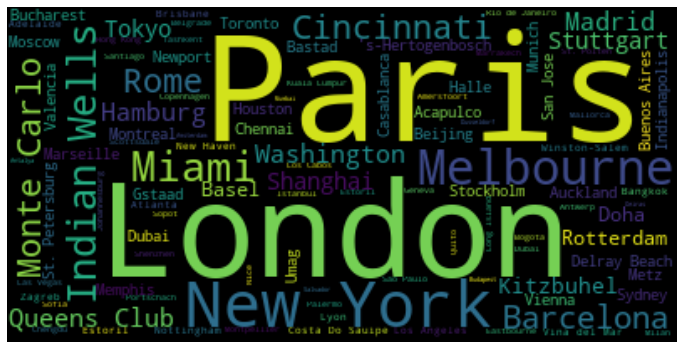

In [23]:
print("**********************************")
print("Location of Tennis Tournament")
print("**********************************")
print(list(df_atp['Location'].unique()))


location_dict = {}
for loc, count in df_atp['Location'].value_counts().reset_index().values:
    location_dict[loc] = count



wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=location_dict)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
print("****************************")
print("Tennis Tournaments")
print("****************************")
print(list(df_atp['Tournament'].unique()))


****************************
Tennis Tournaments
****************************
['Australian Hardcourt Championships', 'Gold Flake Open', 'Qatar Open', 'Heineken Open', 'Sydney International', 'Australian Open', 'Dubai Open', 'Marseille Open', 'Sybase Open', 'Kroger St. Jude', 'ABN AMRO World Tennis Tournament', 'AXA Cup', 'Mexican Open', 'Copenhagen Open', 'Citrix Tennis Championships', 'Chevrolet Cup', 'Colombia Open', 'Franklin Templeton Tennis Classic', 'Indian Wells TMS', 'Ericsson Open', 'Galleryfurniture.com Tennis Challenge', 'Grand Prix Hassan II', 'Estoril Open', 'Monte Carlo Masters', 'Open Seat Godo', 'Mallorca Open', 'BMW Open', 'U.S. Clay Court Championships', 'Rome TMS', 'Hamburg TMS', 'Internationaler Raiffeisen Grand Prix', 'French Open', 'Gerry Weber Open', 'Stella Artois', 'Nottingham Open', 'Heineken Trophy', 'Wimbledon', 'Swedish Open', 'Gstaad Open', 'Hall of Fame Championships', 'Dutch Open', 'Mercedes Cup', 'Croatia Open', 'Generali Open', 'Mercedes-Benz Cup', "Ten

In [25]:
print("***************************")
print("Types of Tennis Tournament")
print("***************************")
print(list(df_atp['Series'].unique()))

***************************
Types of Tennis Tournament
***************************
['International', 'Grand Slam', 'International Gold', 'Masters', 'Masters Cup', 'ATP250', 'ATP500', 'Masters 1000']


In [26]:
print("****************************")
print("Rounds in Tennis Tournament")
print("****************************")
print(list(df_atp['Round'].unique()))

****************************
Rounds in Tennis Tournament
****************************
['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals', 'The Final', '3rd Round', '4th Round', 'Round Robin']


In [27]:
print("*****************************")
print("Courts in Tennis Tournament")
print("*****************************")
print(list(df_atp['Court'].unique()))


*****************************
Courts in Tennis Tournament
*****************************
['Outdoor', 'Indoor']


In [28]:
print("****************************")
print("Surface in Tennis Tournament")
print("****************************")
print(list(df_atp['Surface'].unique()))

****************************
Surface in Tennis Tournament
****************************
['Hard', 'Clay', 'Grass', 'Carpet']


In [29]:
print("************************************")
print("Best sets type in Tennis Tournament")
print("************************************")
print(list(df_atp['Best of'].unique()))

************************************
Best sets type in Tennis Tournament
************************************
[3, 5]


In [30]:
print("************************************")
print("Match Status Tennis Tournament")
print("************************************")
print(list(df_atp['Comment'].unique()))

************************************
Match Status Tennis Tournament
************************************
['Completed', 'Retired', 'Walkover', 'Disqualified', 'Sched']


In [31]:
cat_cols = ['Series', 'Court', 'Surface','Round','Best of','Comment']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


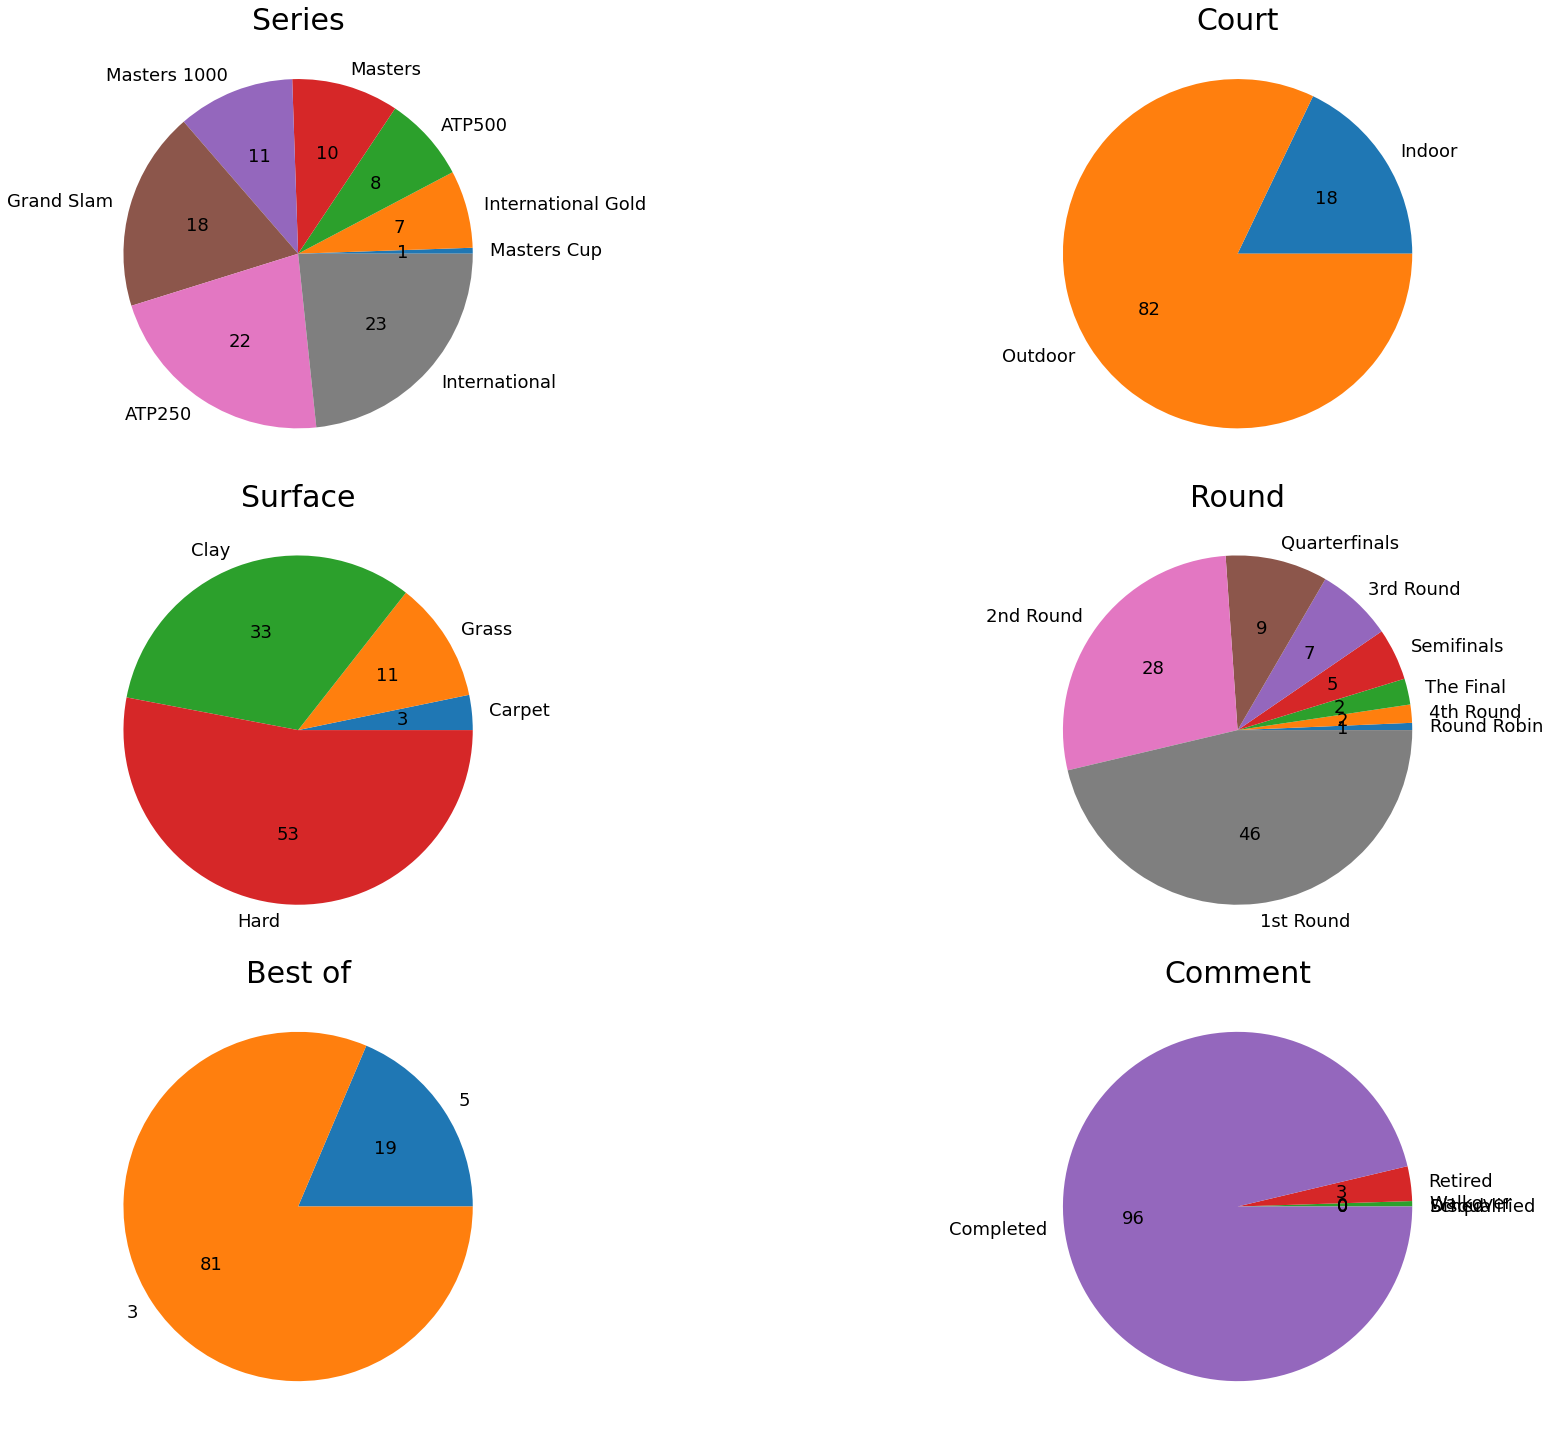

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(df_atp[cat_cols]):
    _ = df_atp[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    _ = axes[i].title.set_color("black")
    _ = axes[i].title.set_size(30)
    
_ = plt.tight_layout()

In [33]:
# Creating the rank difference of winner and loser for a relative understanding
df_atp['Players_Rank_Diff'] = df_atp['WRank'] - df_atp['LRank']
df_atp['Players_Rank_Diff']

0        -14.0
1        -51.0
2       -615.0
3        -22.0
4       -117.0
         ...  
52293     -5.0
52294     -6.0
52295      2.0
52296     -5.0
52297      4.0
Name: Players_Rank_Diff, Length: 52298, dtype: float64

In [34]:
#Assigning Round Points
# 1 - First Round
# 1 - Round Robin
# 2 - Second Round
# 3 - Third Round
# 4 - Fourth Round
# 5 - Quarter Finals
# 6 - Semi Finals
# 7 - Final

cleanup_round = {"Round":     {"1st Round": 1, "2nd Round": 2, '3rd Round':3, '4th Round':4, 'Quarterfinals':5,'Semifinals':6,
                             'The Final': 7, 'Round Robin': 1} }

df_atp = df_atp.replace(cleanup_round)


In [35]:
# Replacing Winner as Player1 and Loser as Player2 and adding one more column Winner_Game to understand who won the game

df_atp['Player1'] = df_atp['Winner']
df_atp['Player2'] = df_atp['Loser']


df_atp['Winner_Game'] = df_atp['Winner']
df_atp

ATP  Location                          Tournament       Date  \
0        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
1        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
2        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
3        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
4        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
...    ...       ...                                 ...        ...   
52293   67    London                         Masters Cup 2018-11-16   
52294   67    London                         Masters Cup 2018-11-16   
52295   67    London                         Masters Cup 2018-11-17   
52296   67    London                         Masters Cup 2018-11-17   
52297   67    London                         Masters Cup 2018-11-18   

              Series    Court Surface  Round  Best of       Winner  \
0      International  Outdoor    Hard      1        3   Dosedel S.   
1      International  Outdoor    Hard      1        3   Enqvist T.   
2      International  Outdoor    Hard      1        3    Escude N.   
3      International  Outdoor    Hard      1        3   Federer R.   
4      International  Outdoor    Hard      1        3  Fromberg R.   
...              ...      ...     ...    ...      ...          ...   
52293    Masters Cup   Indoor    Hard      1        3    Zverev A.   
52294    Masters Cup   Indoor    Hard      1        3  Djokovic N.   
52295    Masters Cup   Indoor    Hard      6        3    Zverev A.   
52296    Masters Cup   Indoor    Hard      6        3  Djokovic N.   
52297    Masters Cup   Indoor    Hard      7        3    Zverev A.   

                Loser  WRank  LRank   W1   L1   W2   L2   W3   L3   W4   L4  \
0         Ljubicic I.   63.0   77.0  6.0  4.0  6.0  2.0  0.0  0.0  0.0  0.0   
1          Clement A.    5.0   56.0  6.0  3.0  6.0  3.0  0.0  0.0  0.0  0.0   
2       Baccanello P.   40.0  655.0  6.0  7.0  7.0  5.0  6.0  3.0  0.0  0.0   
3      Knippschild J.   65.0   87.0  6.0  1.0  6.0  4.0  0.0  0.0  0.0  0.0   
4       Woodbridge T.   81.0  198.0  7.0  6.0  5.0  7.0  6.0  4.0  0.0  0.0   
...               ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
52293        Isner J.    5.0   10.0  7.0  6.0  6.0  3.0  0.0  0.0  0.0  0.0   
52294        Cilic M.    1.0    7.0  7.0  6.0  6.0  2.0  0.0  0.0  0.0  0.0   
52295      Federer R.    5.0    3.0  7.0  5.0  7.0  6.0  0.0  0.0  0.0  0.0   
52296     Anderson K.    1.0    6.0  6.0  2.0  6.0  2.0  0.0  0.0  0.0  0.0   
52297     Djokovic N.    5.0    1.0  6.0  4.0  6.0  3.0  0.0  0.0  0.0  0.0   

        W5   L5  Wsets  Lsets    Comment  CBW  CBL  GBW  GBL  IWW  IWL  SBW  \
0      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...    ...    ...        ...  ...  ...  ...  ...  ...  ...  ...   
52293  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52294  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52295  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52296  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52297  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       SBL  B365W  B365L  B&WW  B&WL   EXW   EXL   PSW   PSL    WPts    LPts  \
0      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
1      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
2      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
3      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
4      0.0   0.

In [36]:
# We want to Swap the Player 1, Player 2 columns for certain records to create a balanced dataset
# Normal Case: Player1 Vs Player 2  Winner: Player1
# After Swapping , if it is Player1 Vs Player 2, Winner : Player1, if it is Player2 Vs Player1, Winner : Player 2

X = df_atp[["Player1", "Player2"]]
y = df_atp[['Winner_Game']]

print(X)
print(y)

           Player1         Player2
0       Dosedel S.     Ljubicic I.
1       Enqvist T.      Clement A.
2        Escude N.   Baccanello P.
3       Federer R.  Knippschild J.
4      Fromberg R.   Woodbridge T.
...            ...             ...
52293    Zverev A.        Isner J.
52294  Djokovic N.        Cilic M.
52295    Zverev A.      Federer R.
52296  Djokovic N.     Anderson K.
52297    Zverev A.     Djokovic N.

[52298 rows x 2 columns]
       Winner_Game
0       Dosedel S.
1       Enqvist T.
2        Escude N.
3       Federer R.
4      Fromberg R.
...            ...
52293    Zverev A.
52294  Djokovic N.
52295    Zverev A.
52296  Djokovic N.
52297    Zverev A.

[52298 rows x 1 columns]


In [37]:
# Rabdomly swapping Player1 and Player 2

import random
for i in range(X.shape[0]):
    rand = random.getrandbits(1)
    if rand == True:
        X.iloc[i][0], X.iloc[i][1] = X.iloc[i][1], X.iloc[i][0]
print(X)        

              Player1      Player2
0         Ljubicic I.   Dosedel S.
1          Clement A.   Enqvist T.
2       Baccanello P.    Escude N.
3      Knippschild J.   Federer R.
4       Woodbridge T.  Fromberg R.
...               ...          ...
52293       Zverev A.     Isner J.
52294        Cilic M.  Djokovic N.
52295       Zverev A.   Federer R.
52296     Djokovic N.  Anderson K.
52297       Zverev A.  Djokovic N.

[52298 rows x 2 columns]


In [38]:
# If there is no swap for a record, Winner_Game = 1, else Winner_Game = 0

y1 = pd.DataFrame(data=np.zeros(shape= (len(y),1)), columns= ['Winner_Game'], dtype= np.int64)
for i in y.index:
    if y['Winner_Game'][i] == X['Player1'][i]:
        y1['Winner_Game'][i] = 1
y = y1
print(y)
print(y.value_counts())

# The shuffling created is balanced

       Winner_Game
0                0
1                0
2                0
3                0
4                0
...            ...
52293            1
52294            0
52295            1
52296            1
52297            1

[52298 rows x 1 columns]
Winner_Game
0              26164
1              26134
dtype: int64


In [39]:
print("******************************************************************************")
print("              Before Swapping the relevant columns                             ")
print("******************************************************************************")
df_atp

******************************************************************************
              Before Swapping the relevant columns                             
******************************************************************************


ATP  Location                          Tournament       Date  \
0        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
1        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
2        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
3        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
4        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
...    ...       ...                                 ...        ...   
52293   67    London                         Masters Cup 2018-11-16   
52294   67    London                         Masters Cup 2018-11-16   
52295   67    London                         Masters Cup 2018-11-17   
52296   67    London                         Masters Cup 2018-11-17   
52297   67    London                         Masters Cup 2018-11-18   

              Series    Court Surface  Round  Best of       Winner  \
0      International  Outdoor    Hard      1        3   Dosedel S.   
1      International  Outdoor    Hard      1        3   Enqvist T.   
2      International  Outdoor    Hard      1        3    Escude N.   
3      International  Outdoor    Hard      1        3   Federer R.   
4      International  Outdoor    Hard      1        3  Fromberg R.   
...              ...      ...     ...    ...      ...          ...   
52293    Masters Cup   Indoor    Hard      1        3    Zverev A.   
52294    Masters Cup   Indoor    Hard      1        3  Djokovic N.   
52295    Masters Cup   Indoor    Hard      6        3    Zverev A.   
52296    Masters Cup   Indoor    Hard      6        3  Djokovic N.   
52297    Masters Cup   Indoor    Hard      7        3    Zverev A.   

                Loser  WRank  LRank   W1   L1   W2   L2   W3   L3   W4   L4  \
0         Ljubicic I.   63.0   77.0  6.0  4.0  6.0  2.0  0.0  0.0  0.0  0.0   
1          Clement A.    5.0   56.0  6.0  3.0  6.0  3.0  0.0  0.0  0.0  0.0   
2       Baccanello P.   40.0  655.0  6.0  7.0  7.0  5.0  6.0  3.0  0.0  0.0   
3      Knippschild J.   65.0   87.0  6.0  1.0  6.0  4.0  0.0  0.0  0.0  0.0   
4       Woodbridge T.   81.0  198.0  7.0  6.0  5.0  7.0  6.0  4.0  0.0  0.0   
...               ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
52293        Isner J.    5.0   10.0  7.0  6.0  6.0  3.0  0.0  0.0  0.0  0.0   
52294        Cilic M.    1.0    7.0  7.0  6.0  6.0  2.0  0.0  0.0  0.0  0.0   
52295      Federer R.    5.0    3.0  7.0  5.0  7.0  6.0  0.0  0.0  0.0  0.0   
52296     Anderson K.    1.0    6.0  6.0  2.0  6.0  2.0  0.0  0.0  0.0  0.0   
52297     Djokovic N.    5.0    1.0  6.0  4.0  6.0  3.0  0.0  0.0  0.0  0.0   

        W5   L5  Wsets  Lsets    Comment  CBW  CBL  GBW  GBL  IWW  IWL  SBW  \
0      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...    ...    ...        ...  ...  ...  ...  ...  ...  ...  ...   
52293  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52294  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52295  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52296  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52297  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       SBL  B365W  B365L  B&WW  B&WL   EXW   EXL   PSW   PSL    WPts    LPts  \
0      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
1      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
2      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
3      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
4      0.0   0.

In [40]:
%%time 

# Swapping Only relevant columns records for a player when Winner_Game = 0 
# Columns are : - Player1, Player2, (Players_Rank_Diff*-1), Player1MatchVictory%, Player1GameVictory%, Player1SetVictory%,
#                 Player2MatchVictory%, Player2GameVictory%, Player2SetVictory%, Booking Odds(AvgW, AvgL)          

print("******************************************************************************")
print("                  Swapping in Progress.Please be Patient                     ")
print("******************************************************************************")

 # Creating a new column Has_Player1_Won 
 # 1 indicates Player1 Won
 # 0 indicates Player1 Lost

df_atp['Has_Player1_Won'] = y['Winner_Game']  
#print(df_atp['Winner_Game'])
for i in range(0, len(df_atp)):
    temp_MatchVictory= 0
    temp_GameVictory = 0
    temp_SetVictory = 0
    winner_game = df_atp.loc[i,'Has_Player1_Won']
    #print(winner_game)
    if (winner_game==1):
        df_atp.loc[i,'Player1'] = df_atp.loc[i,'Winner']
        df_atp.loc[i,'Player2'] = df_atp.loc[i,'Loser']
        df_atp.loc[i,'AvgW'] = df_atp.loc[i,'AvgW']
        df_atp.loc[i,'AvgL'] = df_atp.loc[i,'AvgL']
    elif (winner_game==0):
        df_atp.loc[i,'Player1'] = df_atp.loc[i,'Loser']
        df_atp.loc[i,'Player2'] = df_atp.loc[i,'Winner']
        df_atp.loc[i,'Players_Rank_Diff'] = (df_atp.loc[i,'Players_Rank_Diff'] * -1)
        temp_MatchVictory = df_atp.loc[i,'Player1MatchVictory%']
        temp_GameVictory = df_atp.loc[i,'Player1GameVictory%']
        temp_SetVictory = df_atp.loc[i,'Player1SetVictory%']
        df_atp.loc[i,'Player1MatchVictory%'] = df_atp.loc[i,'Player2MatchVictory%']
        df_atp.loc[i,'Player1GameVictory%'] = df_atp.loc[i,'Player2GameVictory%']
        df_atp.loc[i,'Player1SetVictory%'] = df_atp.loc[i,'Player2SetVictory%']
        df_atp.loc[i,'Player2MatchVictory%'] = temp_MatchVictory
        df_atp.loc[i,'Player2GameVictory%'] = temp_GameVictory
        df_atp.loc[i,'Player2SetVictory%'] = temp_SetVictory
        temp_avgw = df_atp.loc[i,'AvgW']
        df_atp.loc[i,'AvgW'] = df_atp.loc[i,'AvgL']
        df_atp.loc[i,'AvgL'] = temp_avgw
        
print("******************************************************************************")
print("                                  Completed                                   ")
print("******************************************************************************")        

******************************************************************************
                  Swapping in Progress.Please be Patient                     
******************************************************************************
******************************************************************************
                                  Completed                                   
******************************************************************************
CPU times: user 3min 39s, sys: 3.8 s, total: 3min 43s
Wall time: 3min 43s


In [41]:
print("******************************************************************************")
print("              After Swapping the relevant columns                             ")
print("******************************************************************************")
df_atp

******************************************************************************
              After Swapping the relevant columns                             
******************************************************************************


ATP  Location                          Tournament       Date  \
0        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
1        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
2        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
3        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
4        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
...    ...       ...                                 ...        ...   
52293   67    London                         Masters Cup 2018-11-16   
52294   67    London                         Masters Cup 2018-11-16   
52295   67    London                         Masters Cup 2018-11-17   
52296   67    London                         Masters Cup 2018-11-17   
52297   67    London                         Masters Cup 2018-11-18   

              Series    Court Surface  Round  Best of       Winner  \
0      International  Outdoor    Hard      1        3   Dosedel S.   
1      International  Outdoor    Hard      1        3   Enqvist T.   
2      International  Outdoor    Hard      1        3    Escude N.   
3      International  Outdoor    Hard      1        3   Federer R.   
4      International  Outdoor    Hard      1        3  Fromberg R.   
...              ...      ...     ...    ...      ...          ...   
52293    Masters Cup   Indoor    Hard      1        3    Zverev A.   
52294    Masters Cup   Indoor    Hard      1        3  Djokovic N.   
52295    Masters Cup   Indoor    Hard      6        3    Zverev A.   
52296    Masters Cup   Indoor    Hard      6        3  Djokovic N.   
52297    Masters Cup   Indoor    Hard      7        3    Zverev A.   

                Loser  WRank  LRank   W1   L1   W2   L2   W3   L3   W4   L4  \
0         Ljubicic I.   63.0   77.0  6.0  4.0  6.0  2.0  0.0  0.0  0.0  0.0   
1          Clement A.    5.0   56.0  6.0  3.0  6.0  3.0  0.0  0.0  0.0  0.0   
2       Baccanello P.   40.0  655.0  6.0  7.0  7.0  5.0  6.0  3.0  0.0  0.0   
3      Knippschild J.   65.0   87.0  6.0  1.0  6.0  4.0  0.0  0.0  0.0  0.0   
4       Woodbridge T.   81.0  198.0  7.0  6.0  5.0  7.0  6.0  4.0  0.0  0.0   
...               ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
52293        Isner J.    5.0   10.0  7.0  6.0  6.0  3.0  0.0  0.0  0.0  0.0   
52294        Cilic M.    1.0    7.0  7.0  6.0  6.0  2.0  0.0  0.0  0.0  0.0   
52295      Federer R.    5.0    3.0  7.0  5.0  7.0  6.0  0.0  0.0  0.0  0.0   
52296     Anderson K.    1.0    6.0  6.0  2.0  6.0  2.0  0.0  0.0  0.0  0.0   
52297     Djokovic N.    5.0    1.0  6.0  4.0  6.0  3.0  0.0  0.0  0.0  0.0   

        W5   L5  Wsets  Lsets    Comment  CBW  CBL  GBW  GBL  IWW  IWL  SBW  \
0      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...    ...    ...        ...  ...  ...  ...  ...  ...  ...  ...   
52293  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52294  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52295  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52296  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52297  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       SBL  B365W  B365L  B&WW  B&WL   EXW   EXL   PSW   PSL    WPts    LPts  \
0      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
1      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
2      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
3      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
4      0.0   0.

In [42]:
# Mapping Player's name with Player ID

df_atp['Player1'] = df_atp['Player1'].map(players_id)
df_atp['Player2'] = df_atp['Player2'].map(players_id)

In [43]:
df_atp

ATP  Location                          Tournament       Date  \
0        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
1        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
2        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
3        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
4        1  Adelaide  Australian Hardcourt Championships 2000-01-03   
...    ...       ...                                 ...        ...   
52293   67    London                         Masters Cup 2018-11-16   
52294   67    London                         Masters Cup 2018-11-16   
52295   67    London                         Masters Cup 2018-11-17   
52296   67    London                         Masters Cup 2018-11-17   
52297   67    London                         Masters Cup 2018-11-18   

              Series    Court Surface  Round  Best of       Winner  \
0      International  Outdoor    Hard      1        3   Dosedel S.   
1      International  Outdoor    Hard      1        3   Enqvist T.   
2      International  Outdoor    Hard      1        3    Escude N.   
3      International  Outdoor    Hard      1        3   Federer R.   
4      International  Outdoor    Hard      1        3  Fromberg R.   
...              ...      ...     ...    ...      ...          ...   
52293    Masters Cup   Indoor    Hard      1        3    Zverev A.   
52294    Masters Cup   Indoor    Hard      1        3  Djokovic N.   
52295    Masters Cup   Indoor    Hard      6        3    Zverev A.   
52296    Masters Cup   Indoor    Hard      6        3  Djokovic N.   
52297    Masters Cup   Indoor    Hard      7        3    Zverev A.   

                Loser  WRank  LRank   W1   L1   W2   L2   W3   L3   W4   L4  \
0         Ljubicic I.   63.0   77.0  6.0  4.0  6.0  2.0  0.0  0.0  0.0  0.0   
1          Clement A.    5.0   56.0  6.0  3.0  6.0  3.0  0.0  0.0  0.0  0.0   
2       Baccanello P.   40.0  655.0  6.0  7.0  7.0  5.0  6.0  3.0  0.0  0.0   
3      Knippschild J.   65.0   87.0  6.0  1.0  6.0  4.0  0.0  0.0  0.0  0.0   
4       Woodbridge T.   81.0  198.0  7.0  6.0  5.0  7.0  6.0  4.0  0.0  0.0   
...               ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
52293        Isner J.    5.0   10.0  7.0  6.0  6.0  3.0  0.0  0.0  0.0  0.0   
52294        Cilic M.    1.0    7.0  7.0  6.0  6.0  2.0  0.0  0.0  0.0  0.0   
52295      Federer R.    5.0    3.0  7.0  5.0  7.0  6.0  0.0  0.0  0.0  0.0   
52296     Anderson K.    1.0    6.0  6.0  2.0  6.0  2.0  0.0  0.0  0.0  0.0   
52297     Djokovic N.    5.0    1.0  6.0  4.0  6.0  3.0  0.0  0.0  0.0  0.0   

        W5   L5  Wsets  Lsets    Comment  CBW  CBL  GBW  GBL  IWW  IWL  SBW  \
0      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0    2.0    1.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...    ...    ...        ...  ...  ...  ...  ...  ...  ...  ...   
52293  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52294  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52295  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52296  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
52297  0.0  0.0    2.0    0.0  Completed  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       SBL  B365W  B365L  B&WW  B&WL   EXW   EXL   PSW   PSL    WPts    LPts  \
0      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
1      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
2      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
3      0.0   0.00   0.00   0.0   0.0  0.00  0.00  0.00  0.00     0.0     0.0   
4      0.0   0.

In [44]:
# Dropping all the irrelevant columns regarding betting odds, ranks and sets (we have already extracted features from it)

dataset_copy = df_atp.copy()

cols_to_drop = ['ATP','Location','Tournament','Date','Best of','Winner','Loser',
                'W1','W2','W3','W4','W5','L1','L2','L3','L4','L5',
                'Wsets','Lsets','WPts','LPts','CBW','CBL','GBW','GBL',
                'IWW','IWL','SBW','SBL','B365W','B365L','B&WW','B&WL',
                'EXW','EXL','PSW','PSL','UBW','UBL','LBW','LBL',
                'SJW','SJL','MaxW','MaxL', 'WRank','LRank','Winner_Game']

for col in cols_to_drop:
    dataset_copy = dataset_copy.drop(col,axis=1)

In [45]:
# One hot encoding for categorical variables
CAT_COLS = ['Series','Court','Surface','Comment','Player1','Player2']
dataset_copy = pd.get_dummies(dataset_copy, columns = CAT_COLS)

In [46]:
# Seperating the data into dataset based on Year from 2000-2016 (for training),  dataset 2017 and dataset 2018 (for evaluation)

dataset_2000_2016 = dataset_copy[((dataset_copy['Year'] >= 2000) & (dataset_copy['Year'] <= 2016) )]
dataset_2017 = dataset_copy[dataset_copy['Year'] == 2017]
dataset_2018 = dataset_copy[dataset_copy['Year'] == 2018]

In [47]:
dataset_2000_2016

Round  AvgW  AvgL  Year  Player1MatchVictory%  Player1GameVictory%  \
0          1  0.00  0.00  2000                  0.00                 0.00   
1          1  0.00  0.00  2000                  0.00                 0.00   
2          1  0.00  0.00  2000                  0.00                 0.00   
3          1  0.00  0.00  2000                  0.00                 0.00   
4          1  0.00  0.00  2000                  0.00                 0.00   
...      ...   ...   ...   ...                   ...                  ...   
47023      1  3.68  1.28  2016                 36.14                28.51   
47024      1  2.41  1.56  2016                 64.64                73.04   
47025      6  4.28  1.22  2016                 32.14                26.14   
47026      6  4.20  1.23  2016                 33.33                21.49   
47027      7  2.60  1.50  2016                 77.23                83.00   

       Player1SetVictory%  Player2MatchVictory%  Player2GameVictory%  \
0                    0.00                  0.00                 0.00   
1                    0.00                  0.00                 0.00   
2                    0.00                  0.00                 0.00   
3                    0.00                  0.00                 0.00   
4                    0.00                  0.00                 0.00   
...                   ...                   ...                  ...   
47023               11.43                 77.17                82.95   
47024               90.62                 33.17                21.33   
47025                8.43                 77.20                82.97   
47026                5.93                 83.28                86.86   
47027               93.88                 16.71                13.13   

       Player2SetVictory%  Players_Rank_Diff  Has_Player1_Won  Series_ATP250  \
0                    0.00               14.0                0              0   
1                    0.00               51.0                0              0   
2                    0.00              615.0                0              0   
3                    0.00               22.0                0              0   
4                    0.00              117.0                0              0   
...                   ...                ...              ...            ...   
47023               93.87                2.0                0              0   
47024                5.78                2.0                1              0   
47025               93.87                3.0                0              0   
47026               95.73                3.0                0              0   
47027                4.26               -1.0                1              0   

       Series_ATP500  Series_Grand Slam  Series_International  \
0                  0                  0                     1   
1                  0                  0                     1   
2                  0                  0                     1   
3                  0                  0                     1   
4                  0                  0                     1   
...              ...                ...                   ...   
47023              0                  0                     0   
47024              0                  0                     0   
47025              0                  0                     0   
47026              0                  0                     0   
47027              0                  0                     0   

       Series_International Gold  Series_Masters  Series_Masters 1000  \
0                              0               0                    0   
1                              0               0                    0   
2                              0               0                    0   
3                              0               0                    0   
4                              0               0                    0   
...                          ...     

In [48]:
dataset_2017

Round  AvgW  AvgL  Year  Player1MatchVictory%  Player1GameVictory%  \
47028      1  3.50  1.29  2017                 75.00                64.18   
47029      1  2.43  1.54  2017                 62.89                50.87   
47030      1  1.77  2.01  2017                 48.92                36.72   
47031      1  3.01  1.37  2017                 66.67                56.76   
47032      1  2.85  1.41  2017                 50.27                42.14   
...      ...   ...   ...   ...                   ...                  ...   
49658      6  1.08  8.45  2017                 17.09                14.88   
49659      6  2.95  1.40  2017                 39.52                33.07   
49660      7  3.24  1.36  2017                 40.53                30.48   
49661      1  1.68  2.17  2017                 51.41                42.69   
49662      1  1.39  2.96  2017                 48.94                40.36   

       Player1SetVictory%  Player2MatchVictory%  Player2GameVictory%  \
47028               33.33                 21.43                20.81   
47029               22.33                 44.57                53.05   
47030               14.67                 67.07                75.47   
47031               20.00                 40.38                52.67   
47032               16.00                 59.12                66.48   
...                   ...                   ...                  ...   
49658                5.47                 59.33                69.41   
49659               13.61                 61.08                67.86   
49660               10.72                 61.18                67.96   
49661               19.23                 52.24                61.15   
49662               14.86                 28.57                60.87   

       Player2SetVictory%  Players_Rank_Diff  Has_Player1_Won  Series_ATP250  \
47028               42.86               81.0                0              1   
47029               83.17               15.0                0              1   
47030               91.65                5.0                0              1   
47031               83.33               96.0                0              1   
47032               87.89               16.0                0              1   
...                   ...                ...              ...            ...   
49658               89.23               -6.0                0              0   
49659               88.09                3.0                0              0   
49660               88.13                2.0                0              0   
49661               83.55             -143.0                0              1   
49662              100.00             -165.0                0              1   

       Series_ATP500  Series_Grand Slam  Series_International  \
47028              0                  0                     0   
47029              0                  0                     0   
47030              0                  0                     0   
47031              0                  0                     0   
47032              0                  0                     0   
...              ...                ...                   ...   
49658              0                  0                     0   
49659              0                  0                     0   
49660              0                  0                     0   
49661              0                  0                     0   
49662              0                  0                     0   

       Series_International Gold  Series_Masters  Series_Masters 1000  \
47028                          0               0                    0   
47029                          0               0                    0   
47030                          0               0                    0   
47031                          0               0                    0   
47032                          0               0                    0   
...                          ...     

In [49]:
dataset_2018

Round  AvgW  AvgL  Year  Player1MatchVictory%  Player1GameVictory%  \
49663      1  1.67  2.17  2018                 42.40                51.04   
49664      1  1.58  2.37  2018                 76.32                70.26   
49665      1  2.73  1.44  2018                 75.00                70.71   
49666      1  2.20  1.66  2018                 39.90                49.69   
49667      1  1.89  1.89  2018                 44.59                53.07   
...      ...   ...   ...   ...                   ...                  ...   
52293      1  1.38  3.14  2018                 66.40                72.68   
52294      1  5.14  1.17  2018                 34.80                27.39   
52295      6  3.14  1.38  2018                 66.54                72.78   
52296      6  1.12  6.52  2018                 83.01                86.59   
52297      7  5.69  1.15  2018                 66.67                72.89   

       Player1SetVictory%  Player2MatchVictory%  Player2GameVictory%  \
49663               80.17                 52.79                43.24   
49664               44.44                 34.88                46.56   
49665               37.50                 41.73                53.58   
49666               81.87                 63.33                54.69   
49667               79.27                 67.50                60.26   
...                   ...                   ...                  ...   
52293               87.62                 37.73                32.98   
52294               10.10                 82.99                86.58   
52295               87.68                 17.09                15.01   
52296               95.66                 41.02                33.86   
52297               87.75                 16.98                13.39   

       Player2SetVictory%  Players_Rank_Diff  Has_Player1_Won  Series_ATP250  \
49663               17.31               -5.0                1              1   
49664               78.81                3.0                0              1   
49665               80.84              185.0                0              1   
49666               23.33              -54.0                1              1   
49667               37.78              -40.0                1              1   
...                   ...                ...              ...            ...   
52293               13.62               -5.0                1              0   
52294               95.66                6.0                0              0   
52295                5.53                2.0                1              0   
52296               12.78               -5.0                1              0   
52297                4.33                4.0                1              0   

       Series_ATP500  Series_Grand Slam  Series_International  \
49663              0                  0                     0   
49664              0                  0                     0   
49665              0                  0                     0   
49666              0                  0                     0   
49667              0                  0                     0   
...              ...                ...                   ...   
52293              0                  0                     0   
52294              0                  0                     0   
52295              0                  0                     0   
52296              0                  0                     0   
52297              0                  0                     0   

       Series_International Gold  Series_Masters  Series_Masters 1000  \
49663                          0               0                    0   
49664                          0               0                    0   
49665                          0               0                    0   
49666                          0               0                    0   
49667                          0               0                    0   
...                          ...     

In [50]:
cols_to_drop = ['Year']

for col in cols_to_drop:
    dataset_2000_2016 = dataset_2000_2016.drop(col,axis=1)
    dataset_2017 = dataset_2017.drop(col,axis=1)
    dataset_2018 = dataset_2018.drop(col,axis=1)   

In [51]:
#Downloading the new datasets (if required for additional exploration)

compression_opts = dict(method='zip',
                        archive_name='dataset_2000_2016.csv')  
dataset_2000_2016.to_csv('dataset_2000_2016.zip', index=False,
          compression=compression_opts)

In [52]:
compression_opts = dict(method='zip',
                        archive_name='dataset_2017.csv')  
dataset_2017.to_csv('dataset_2017.zip', index=False,
          compression=compression_opts)

In [53]:
compression_opts = dict(method='zip',
                        archive_name='dataset_2018.csv')  
dataset_2018.to_csv('dataset_2018.zip', index=False,
          compression=compression_opts)

In [54]:
# Creating train dataset and test datasets

train_data = dataset_2000_2016
test_data_2017 = dataset_2017
test_data_2018 = dataset_2018

In [55]:
train_data.columns

Index(['Round', 'AvgW', 'AvgL', 'Player1MatchVictory%', 'Player1GameVictory%',
       'Player1SetVictory%', 'Player2MatchVictory%', 'Player2GameVictory%',
       'Player2SetVictory%', 'Players_Rank_Diff',
       ...
       'Player2_1462', 'Player2_1463', 'Player2_1466', 'Player2_1468',
       'Player2_1469', 'Player2_1470', 'Player2_1477', 'Player2_1481',
       'Player2_1482', 'Player2_1483'],
      dtype='object', length=2518)

In [56]:
train_data['Has_Player1_Won'].value_counts()

0    23520
1    23508
Name: Has_Player1_Won, dtype: int64

In [57]:
test_data_2017['Has_Player1_Won'].value_counts()

0    1360
1    1275
Name: Has_Player1_Won, dtype: int64

In [58]:
test_data_2018['Has_Player1_Won'].value_counts()

1    1351
0    1284
Name: Has_Player1_Won, dtype: int64

In [59]:
#train_data_encoded.isna().sum()
# If Still there are any null values filing it with zero before training

train_data_encoded = train_data.fillna(0,axis=1)
train_data_encoded

Round  AvgW  AvgL  Player1MatchVictory%  Player1GameVictory%  \
0          1  0.00  0.00                  0.00                 0.00   
1          1  0.00  0.00                  0.00                 0.00   
2          1  0.00  0.00                  0.00                 0.00   
3          1  0.00  0.00                  0.00                 0.00   
4          1  0.00  0.00                  0.00                 0.00   
...      ...   ...   ...                   ...                  ...   
47023      1  3.68  1.28                 36.14                28.51   
47024      1  2.41  1.56                 64.64                73.04   
47025      6  4.28  1.22                 32.14                26.14   
47026      6  4.20  1.23                 33.33                21.49   
47027      7  2.60  1.50                 77.23                83.00   

       Player1SetVictory%  Player2MatchVictory%  Player2GameVictory%  \
0                    0.00                  0.00                 0.00   
1                    0.00                  0.00                 0.00   
2                    0.00                  0.00                 0.00   
3                    0.00                  0.00                 0.00   
4                    0.00                  0.00                 0.00   
...                   ...                   ...                  ...   
47023               11.43                 77.17                82.95   
47024               90.62                 33.17                21.33   
47025                8.43                 77.20                82.97   
47026                5.93                 83.28                86.86   
47027               93.88                 16.71                13.13   

       Player2SetVictory%  Players_Rank_Diff  Has_Player1_Won  Series_ATP250  \
0                    0.00               14.0                0              0   
1                    0.00               51.0                0              0   
2                    0.00              615.0                0              0   
3                    0.00               22.0                0              0   
4                    0.00              117.0                0              0   
...                   ...                ...              ...            ...   
47023               93.87                2.0                0              0   
47024                5.78                2.0                1              0   
47025               93.87                3.0                0              0   
47026               95.73                3.0                0              0   
47027                4.26               -1.0                1              0   

       Series_ATP500  Series_Grand Slam  Series_International  \
0                  0                  0                     1   
1                  0                  0                     1   
2                  0                  0                     1   
3                  0                  0                     1   
4                  0                  0                     1   
...              ...                ...                   ...   
47023              0                  0                     0   
47024              0                  0                     0   
47025              0                  0                     0   
47026              0                  0                     0   
47027              0                  0                     0   

       Series_International Gold  Series_Masters  Series_Masters 1000  \
0                              0               0                    0   
1                              0               0                    0   
2                              0               0                    0   
3                              0               0                    0   
4                              0               0                    0   
...                          ...             ...                  ...   
47023                          0    

In [60]:
# If Still there are any null values filing it with zero

test_data_2017_encoded = test_data_2017.fillna(0,axis=1)
test_data_2018_encoded = test_data_2018.fillna(0,axis=1)

In [61]:
# Dropping Target Column from test datasets and saving

TARGET_COL = 'Has_Player1_Won'

target_test_2017 = test_data_2017_encoded[TARGET_COL]
target_test_2018 = test_data_2018_encoded[TARGET_COL]

test_data_2017_encoded = test_data_2017_encoded.drop(TARGET_COL,axis=1)
test_data_2018_encoded = test_data_2018_encoded.drop(TARGET_COL,axis=1)


In [62]:
# Seperating Numerical Columns, Categorical Columns and Features(Numerical + Categorical)

FEATURES = [c for c in train_data_encoded.columns if c not in [TARGET_COL]]
NUM_COLS = ['AvgW','AvgL','Player1MatchVictory%','Player1GameVictory%','Player1SetVictory%','Player2MatchVictory%',
            'Player2GameVictory%','Player2SetVictory%','Players_Rank_Diff']
CAT_COLS = [c for c in train_data_encoded.columns if c not in [NUM_COLS,TARGET_COL]]
           

In [63]:
print(FEATURES)

['Round', 'AvgW', 'AvgL', 'Player1MatchVictory%', 'Player1GameVictory%', 'Player1SetVictory%', 'Player2MatchVictory%', 'Player2GameVictory%', 'Player2SetVictory%', 'Players_Rank_Diff', 'Series_ATP250', 'Series_ATP500', 'Series_Grand Slam', 'Series_International', 'Series_International Gold', 'Series_Masters', 'Series_Masters 1000', 'Series_Masters Cup', 'Court_Indoor', 'Court_Outdoor', 'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Hard', 'Comment_Completed', 'Comment_Disqualified', 'Comment_Retired', 'Comment_Sched', 'Comment_Walkover', 'Player1_1', 'Player1_2', 'Player1_3', 'Player1_4', 'Player1_5', 'Player1_6', 'Player1_7', 'Player1_8', 'Player1_9', 'Player1_10', 'Player1_11', 'Player1_12', 'Player1_13', 'Player1_14', 'Player1_15', 'Player1_16', 'Player1_17', 'Player1_18', 'Player1_19', 'Player1_20', 'Player1_21', 'Player1_22', 'Player1_23', 'Player1_24', 'Player1_25', 'Player1_26', 'Player1_27', 'Player1_28', 'Player1_29', 'Player1_30', 'Player1_31', 'Player1_32', 'Pla

In [64]:
# Splitting the train dataset into training and validation sets

from sklearn.model_selection import train_test_split

trn, val = train_test_split(train_data_encoded, test_size=0.2, random_state = 1, stratify = train_data_encoded[TARGET_COL])

###### Input to our model will be the features
trn_features, val_features = trn[FEATURES], val[FEATURES]

###### Output of our model will be the TARGET_COL
trn_target, val_target = trn[TARGET_COL], val[TARGET_COL]

In [65]:
# Normalizing the numerical features with StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(trn_features)

trn_features = scaler.transform(trn_features)
val_features = scaler.transform(val_features)

**Model 1: - Baseline Model with Decision Tree Classifier**

In [66]:
from sklearn.tree import DecisionTreeClassifier

model_baseline = DecisionTreeClassifier(random_state = 1)
_ = model_baseline.fit(trn[FEATURES], trn[TARGET_COL])

In [67]:
# Function for measuring performance of the model with evaluation metrics


from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

global accuracy
global precision
global recall
global f1score
global false_positive_rate
global true_positive_rate
global roc_auc

def modelPerformance(model,features,target):

  accuracy = 0
  precision = 0
  recall = 0
  f1score = 0
  false_positive_rate = 0
  thresholds = 0
  true_positive_rate = 0
  roc_auc = 0

  prob_clf = model.predict_proba(features)[:,1] # This will give you positive class prediction probabilities  
  pred_clf = np.where(prob_clf > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

  #confusion_matrix = confusion_matrix(target, pred_clf)
  #print(confusion_matrix)

  plot_confusion_matrix(target, pred_clf,figsize=(8,8))

  accuracy = accuracy_score(target, pred_clf)
  precision = precision_score(target, pred_clf)
  recall = recall_score(target, pred_clf)
  f1score = f1_score(target, pred_clf)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(target, prob_clf)
  roc_auc = auc(false_positive_rate, true_positive_rate)

  print("Accuracy: ",accuracy )
  print("Precision: ",precision )
  print("Recall: ",recall )
  print("F1Score: ",f1score )
  print("Area under ROC Curve: ", roc_auc)

  plt.figure(figsize=(6,6))
  plt.title('Receiver Operating Characteristic Curve')
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

Accuracy:  0.5320291318909149
Precision:  0.5666370501999112
Recall:  0.27129639476762735
F1Score:  0.3669183746853649
Area under ROC Curve:  0.5319598470436776


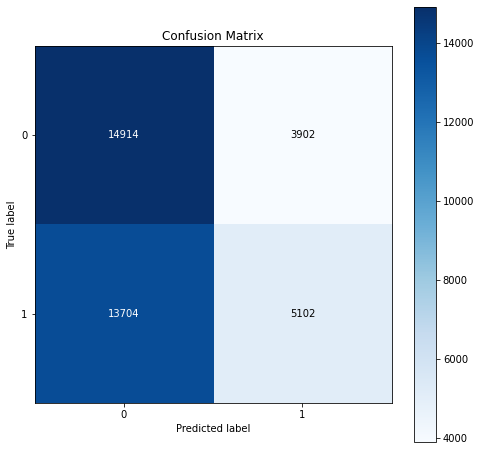

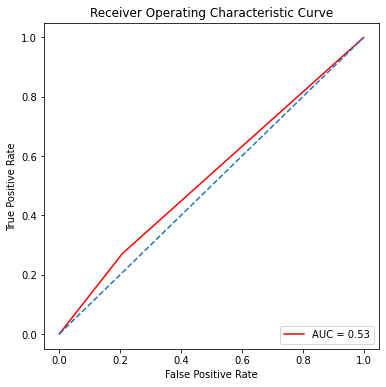

Accuracy:  0.5245587922602594
Precision:  0.5519891500904159
Recall:  0.2596767333049766
F1Score:  0.35319641307492045
Area under ROC Curve:  0.5245024822987467


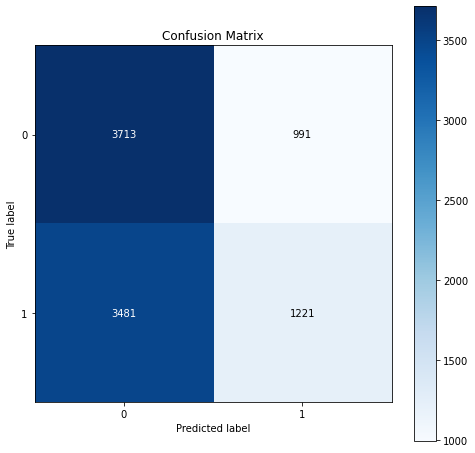

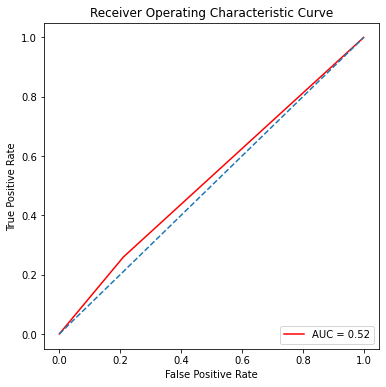

In [68]:
_ = modelPerformance(model_baseline,trn_features,trn_target)
_ = modelPerformance(model_baseline,val_features,val_target)

**Baseline Model gave close to 50% Accuracy**

**Model 2 : Decision Tree Classifier with HyperParameters tuned**

Accuracy:  0.9913348572643665
Precision:  0.9958677685950413
Recall:  0.9867595448261193
F1Score:  0.9912927350427351
Area under ROC Curve:  0.9995329552810438


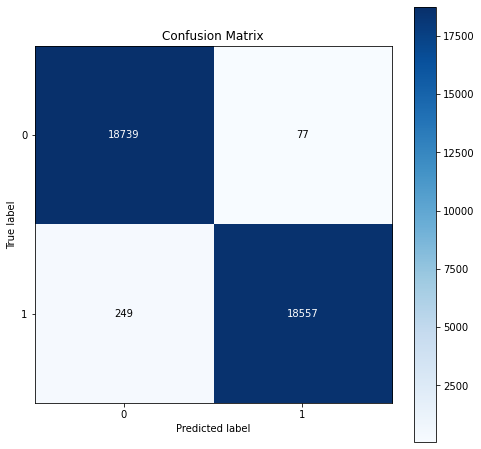

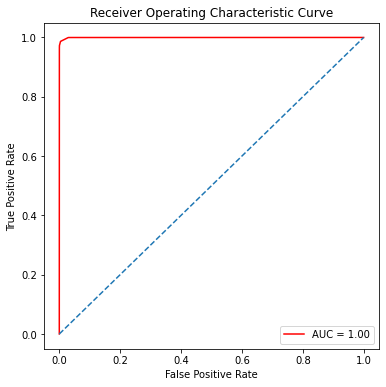

Accuracy:  0.99032532426111
Precision:  0.9946363441321605
Recall:  0.9859634198213526
F1Score:  0.9902808928762149
Area under ROC Curve:  0.9991641727937454


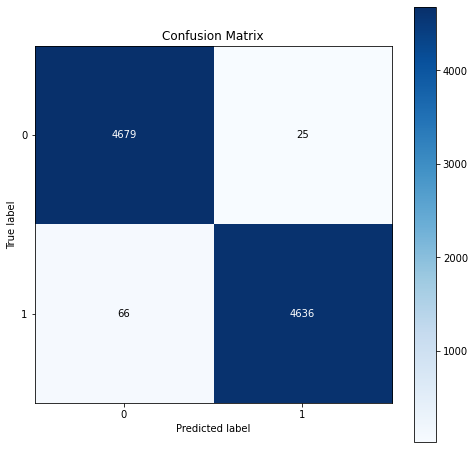

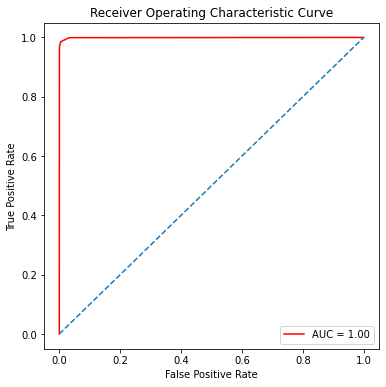

In [69]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.8,
 'max_leaf_nodes': 16,
 'min_samples_split': 20}

model_decisionTree = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = model_decisionTree.fit(trn_features, trn_target)

_ = modelPerformance(model_decisionTree,trn_features,trn_target)
_ = modelPerformance(model_decisionTree,val_features,val_target)

**This model gave a very good accuracy, wow :-)**

**Implementing KFold Cross Validation to check for Overfitting**

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)
  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    model = clf.fit(X_trn, y_trn)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return model, oofs, preds

In [72]:
target = train_data_encoded[TARGET_COL]

**Model 3 : Decision Tree Classifier with Cross Validation and Hyper Parameter Tuning**


------------- Fold 1 -------------

F1 score for validation set is 0.9711925209261877

------------- Fold 2 -------------

F1 score for validation set is 0.9873090987309099

------------- Fold 3 -------------

F1 score for validation set is 0.9923191807126093

------------- Fold 4 -------------

F1 score for validation set is 0.9933831376734258

------------- Fold 5 -------------

F1 score for validation set is 0.9938139931740613


F1 score for oofs is 0.9876654439367613


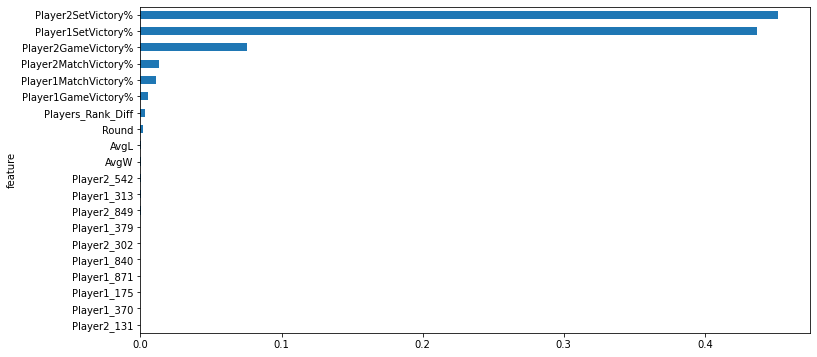

In [73]:
dt_params = {
             'criterion': 'gini',
             'max_depth': 5,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

model_dt, dt_oofs, dt_preds = run_clf_kfold(clf, train_data_encoded, test_data_2017_encoded, FEATURES)

**Testing the model on 2017 and 2018 Datasets after normalizing the features of the dataset**

Accuracy:  0.9946869070208728
Precision:  0.9992082343626286
Recall:  0.9898039215686274
F1Score:  0.9944838455476752
Area under ROC Curve:  0.9999106113033448


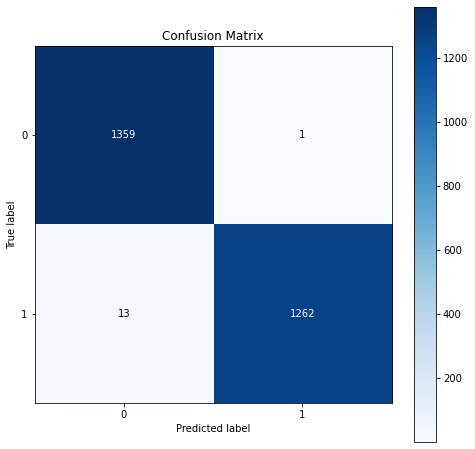

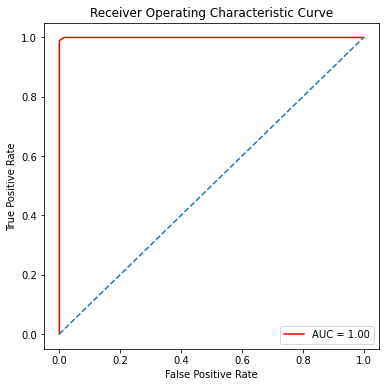

Accuracy:  0.996584440227704
Precision:  1.0
Recall:  0.993338267949667
F1Score:  0.9966580022279985
Area under ROC Curve:  0.9999273642922861


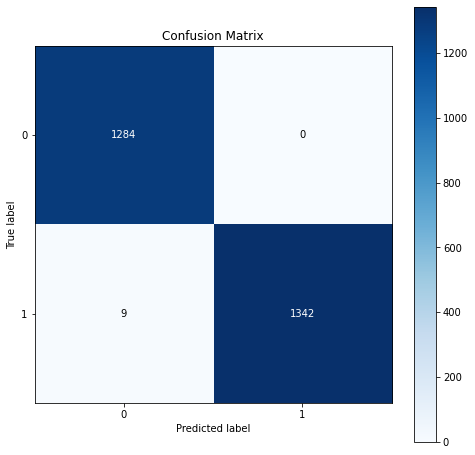

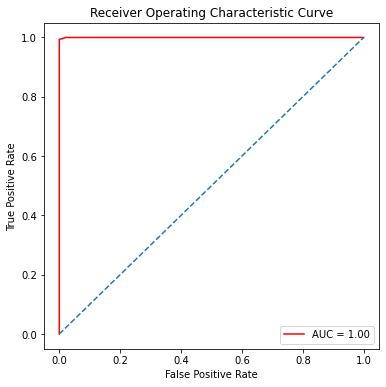

In [74]:
test_2017_scaled = scaler.transform(test_data_2017_encoded)
test_2018_scaled = scaler.transform(test_data_2018_encoded)

_ = modelPerformance(model_dt,test_2017_scaled,target_test_2017)
_ = modelPerformance(model_dt,test_2018_scaled,target_test_2018)

**Model gave a very good performance**

**Model 4 : RandomForest Classifier using Cross Validation and Hyper Parameter Tuning**


------------- Fold 1 -------------


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   36.0s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100building tree 50 of 100

building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9810955961331901

------------- Fold 2 -------------


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100building tree 23 of 100

building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   38.1s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9926541041200893

------------- Fold 3 -------------


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   37.5s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9929622520793346

------------- Fold 4 -------------


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   36.2s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9939264784230155

------------- Fold 5 -------------


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   31.9s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9958559132929551


F1 score for oofs is 0.9913177037779721


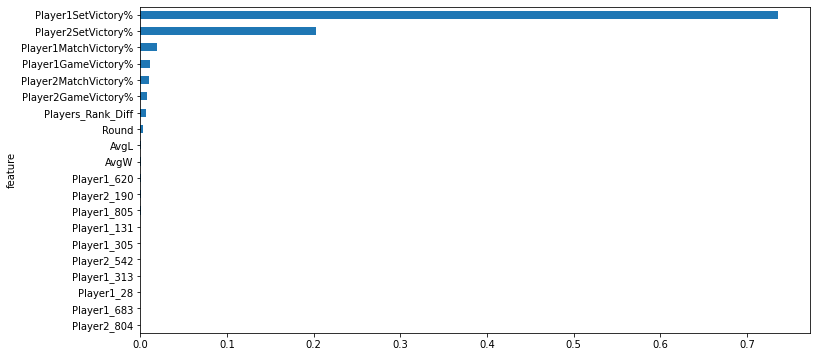

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': 100,
             'n_jobs' : 10,
             'criterion': 'gini',
             'max_depth': 7,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'verbose' : 2,
             'random_state': 1
             }

clf = RandomForestClassifier(**rf_params)
        

model_rf, rf_oofs, rf_preds = run_clf_kfold(clf, train_data_encoded, test_data_2017_encoded, FEATURES)

**Testing the model on 2017 and 2018 Datasets and verifying the performance**

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.996584440227704
Precision:  0.9984251968503937
Recall:  0.9945098039215686
F1Score:  0.9964636542239685
Area under ROC Curve:  0.9999567474048443


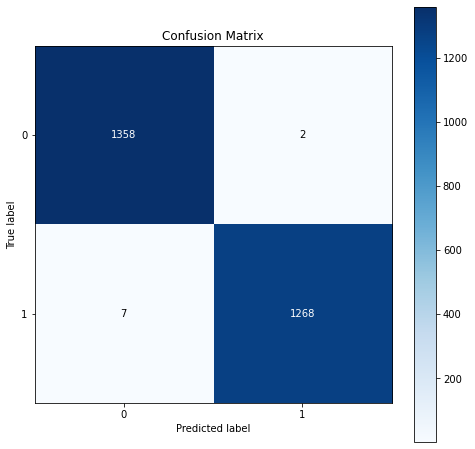

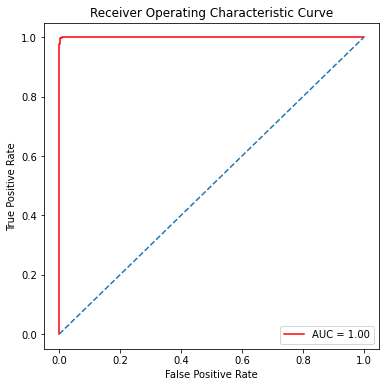

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.9954459203036053
Precision:  0.9962935507783544
Recall:  0.9948186528497409
F1Score:  0.9955555555555555
Area under ROC Curve:  0.999936587874218


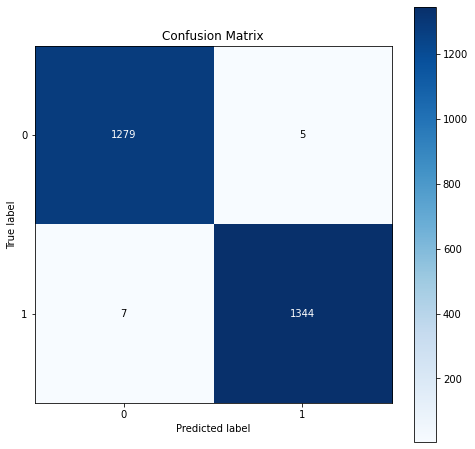

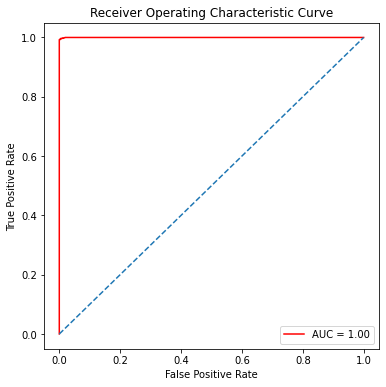

In [76]:
test_2017_scaled = scaler.transform(test_data_2017_encoded)
test_2018_scaled = scaler.transform(test_data_2018_encoded)

_ = modelPerformance(model_rf,test_2017_scaled,target_test_2017)
_ = modelPerformance(model_rf,test_2018_scaled,target_test_2018)

**This model also gave a very good performance**

***Thanks a lot for providing a great learning opportunity  !!***